# Income prediction
### EECS 738
Jan Polzer and Ryan Duckworth

Dataset from: https://www.kaggle.com/uciml/adult-census-income

Import packages

In [26]:
import numpy as np                                   # math tools
import pandas as pd                                  # import and manage datasets
import matplotlib.pyplot as plt                      # plot charts
import statistics                                    # mean, stdev
import seaborn as sns
from sklearn import preprocessing                    # scale, transform data
from sklearn.model_selection import train_test_split # split data
from sklearn.linear_model import LinearRegression
from copy import deepcopy
plt.rcParams['figure.figsize'] = (5,5)
plt.style.use('ggplot')

Load dataset

In [27]:
data = pd.read_csv('data/adult.csv')
data.head(7)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


Drop data without values

In [28]:
data = data[(data != '?').all(axis=1)]

Transform dataset to all numeric values so easy to plot and analyze

In [29]:
le = preprocessing.LabelEncoder()
data = data.apply(le.fit_transform)

Matrix of independent variables

In [30]:
matrix = data.iloc[:, :-1].values 

Dependent variable vector


In [31]:
#Income 0 = Over 50K and 1 = Under 50K
y = data.iloc[:, 14].values

Split dataset into Test set and Training set

In [32]:
X_train, X_test, y_train, y_test = train_test_split(matrix, y, test_size=0.2)

### Explore dataset

In [33]:
print(data.shape)
print(data.head())

(30162, 15)
   age  workclass  fnlwgt  education  education.num  marital.status  \
1   65          2    6096         11              8               6   
3   37          2    6564          5              3               0   
4   24          2   15770         15              9               5   
5   17          2   13278         11              8               0   
6   21          2    7296          0              5               5   

   occupation  relationship  race  sex  capital.gain  capital.loss  \
1           3             1     4    0             0            89   
3           6             4     4    0             0            88   
4           9             3     4    0             0            88   
5           7             4     4    0             0            87   
6           0             4     4    1             0            87   

   hours.per.week  native.country  income  
1              17              38       0  
3              39              38       0  
4       

Plot historgram for each parameter

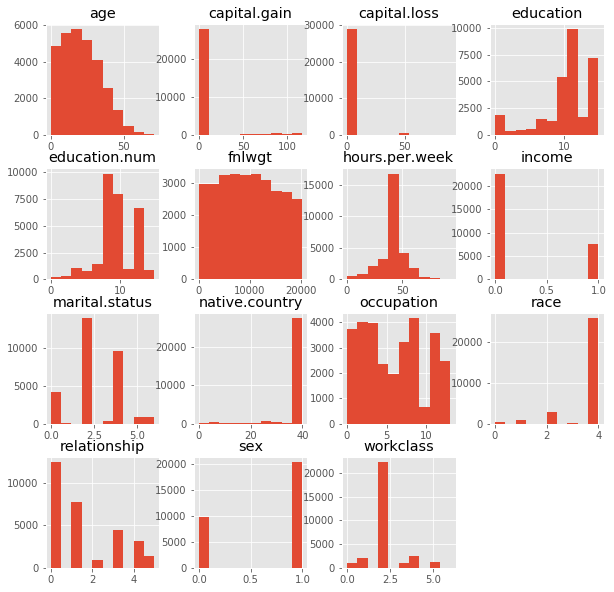

In [34]:
data.hist(figsize = (10, 10))
plt.show()

Determine if income is over/under $50k

In [35]:
over50k = data[data['income'] == 0]
under50k = data[data['income'] == 1]

print('Income over $50k: {}'.format(len(over50k)) + ' samples')
print('Income under $50k: {}'.format(len(under50k)) + ' samples')

Income over $50k: 22654 samples
Income under $50k: 7508 samples


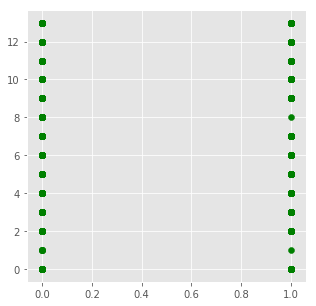

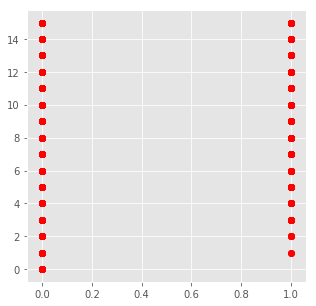

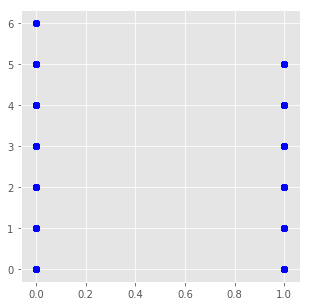

In [36]:
# Getting the values and plotting it
f1 = data['income'].values
f2 = data['occupation'].values
f3 = data['education.num'].values
f4 = data['workclass'].values

X2 = np.array(list(zip(f1, f2)))
X3 = np.array(list(zip(f1, f3)))
X4 = np.array(list(zip(f1, f4)))

plt.scatter(f1, f2, c='green')
plt.show()
plt.scatter(f1, f3, c='red')
plt.show()
plt.scatter(f1, f4, c='blue')
plt.show()


### Analysis 
We have decided to go with occupation as the most valuable feature

In [37]:
# Euclidean Distance Caculator
# From https://mubaris.com/posts/kmeans-clustering/
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [38]:
# Number of clusters
# Over and Ubder 50k
k = 2
# X coordinates of random centroids
C_x = np.random.randint(0, 1, size=k)
# Y coordinates of random centroids
C_y2 = np.random.randint(0, np.max(X2), size=k)
C2 = np.array(list(zip(C_x, C_y2)), dtype=np.float32)

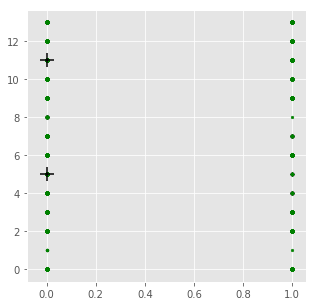

In [39]:
# Plotting along with the Centroids
plt.scatter(f1, f2, c='g', s=7)
plt.scatter(C_x, C_y2, marker='+', s=200, c='black')
plt.show()

In [40]:
# Array of clusters
clustersList = []

In [41]:
# Update the Centroid by minimizing the error to 0
# From https://mubaris.com/posts/kmeans-clustering/
def centroidUpdate(C,X):
    # To store the value of centroids when it updates
    C_old = np.zeros(C.shape)
    # Cluster Lables(0, 1, 2)
    clusters = np.zeros(len(X))
    # Error func. - Distance between new centroids and old centroids
    error = dist(C, C_old, None)
    # Loop will run till the error becomes zero
    while error >= 0.01:
        # Assigning each value to its closest cluster
        for i in range(len(X)):
            distances = dist(X[i], C)
            cluster = np.argmin(distances)
            clusters[i] = cluster
            
        # Storing the old centroid values
        C_old = deepcopy(C)
        # Finding the new centroids by taking the average value
        for i in range(k):
            points = [X[j] for j in range(len(X)) if clusters[j] == i]
            C[i] = np.mean(points, axis=0)
        error = dist(C, C_old, None)
        
    clustersList.append(clusters)
    return C

In [42]:
C2 = centroidUpdate(C2,X2)

In [45]:
# Scatter plot results from centroid calculations 
# From https://mubaris.com/posts/kmeans-clustering/
def centroidPlot(num, C, X, k):
    colors = ['r', 'g', 'b', 'y']
    fig, ax = plt.subplots()
    
    clusters = clustersList[num-2]  #2 becomes 0, 3 becomes 1, 4 becomes 2
    
    for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
    ax.scatter(C[:, 0], C[:, 1], marker='+', s=200, c='#050505')
    ax.set_title('Income Over / Bellow $50,000 prediction')

return

### Final data plot

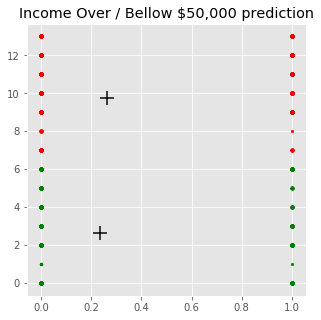

In [46]:
centroidPlot(2,C2,X2,k)